In [108]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
# Load multiple CSV files into one dataframe
dataframes = []
months = ["January", "February", "March", "April", "May", "June", "July",
          "August", "September", "October", "November", "December"]

for month in months:
    dataframes.append(pd.read_csv(f"./sales-data/Sales_{month}_2019.csv"))


df = pd.concat(dataframes, axis=0, ignore_index=True)
df.dropna(subset=["Order Date"], inplace=True)
df.drop(df[df["Order Date"] == "Order Date"].index, inplace=True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
# Save all months data into csv fie
df.to_csv("all_data.csv", index=False)

# What was the best month for sales? How much money was earned that month?

## 1. Create month column

In [101]:
print(df.columns)

# get function that will convert 01/22/19 21:25 to month name
# add new column which will have month name as string
# Iterate over months and count Price*Quantity

def get_month_name(date: str) -> str:
    months = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December',
    }
    date_part = date.split(" ")[0]
    date = datetime.datetime.strptime(date_part, '%m/%d/%y')
    return months[date.month]


df["Month"] = df.apply(lambda x: get_month_name(x['Order Date']), axis=1)
df.head()



Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January


In [70]:
df[df["Month"] == 'December'].size

199872

## 2. Add total column

In [102]:
# Convert Price Each and Quantity Ordered to numeric types
# df = df.astype({'Quantity Ordered': 'int32', "Price Each": "float32"})
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [103]:
df["Total"] = round(df["Quantity Ordered"] * df["Price Each"], 2)
cols = list(df.columns.values)
df = df[cols[:4] + [cols[-1]] + cols[4:-1]]


## 3. Finally group rows by month and check wich month was the best

In [120]:
# Order dataframe by months
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

Order ID                                            319670
Product                         Bose SoundSport Headphones
Quantity Ordered                                         1
Price Each                                           99.99
Total                                                99.99
Order Date                                  12/21/19 21:45
Purchase Address    747 Chestnut St, Los Angeles, CA 90001
Month                                             December
Name: 186849, dtype: object

In [125]:
results = df.groupby("Month").sum()
results.sort_values(["Total"], ascending=False)

,Quantity Ordered,Price Each,Total
Month,,,
December,28114,4.588415e+06,4.613443e+06
October,22703,3.715555e+06,3.736727e+06
April,20558,3.367671e+06,3.390670e+06
November,19798,3.180601e+06,3.199603e+06
May,18667,3.135125e+06,3.152607e+06
March,17005,2.791208e+06,2.807100e+06
July,16072,2.632540e+06,2.647776e+06
June,15253,2.562026e+06,2.577802e+06
August,13448,2.230345e+06,2.244468e+06


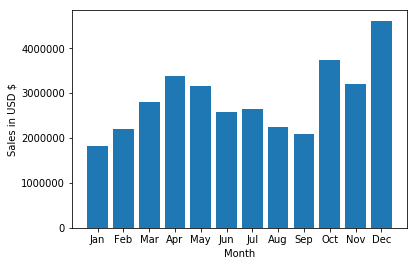

In [137]:
months = list(df["Month"].unique())
for i in range(len(months)):
    months[i] = months[i][:3]

plt.bar(months, results["Total"])
plt.xlabel("Month")
plt.ylabel("Sales in USD $")
plt.show()